In [2]:
# 데이터 시각화 패키지 matplotlib에게 inline출력,
# 즉 시각화 결과를 파일로 저장하거나 하지 않고 화면에 바로 출력하도록 명령합니다.
# (Seaborn이 matplotlib를 기반으로 동작하기 때문에, Seaborn에도 동일한 명령이 전달됩니다.)
%matplotlib inline

# 파이썬의 데이터 분석 패키지 판다스(Pandas)를 가져오고, 이를 pd라는 이름의 축약어로 사용합니다.
import pandas as pd

# 파이썬의 데이터 시각화 패키지 시본(Seaborn)을 가져오고, 이를 sns라는 이름의 축약어로 사용합니다.
import seaborn as sns

In [3]:
# train.csv 파일을 읽어옵니다. 여기서 PassengerId라는 컬럼을 인덱스(index)로 지정한 뒤, train 변수에 할당합니다.
# 변수에 할당한 결과값을 판다스 전문 용어로 데이터프레임(DataFrame)이라고 부릅니다.
train = pd.read_csv("train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력합니다.
train.head(10)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균을 구합니다.
# 그 결과를 survived_rate라는 이름의 변수에 저장합니다.
survived_rate = train["Survived"].mean()

# survived_rate는 현재 0.0 ~ 1.0 사이의 값을 갖습니다.
# 하지만 퍼센티지(%)는 0 ~ 100.0 사이의 값을 가지므로, survived_rate에 100을 곱해줍니다.
survived_rate = survived_rate * 100

# survived_rate를 출력합니다. 결과는 38.4%가 나와야 합니다.
print(f"생존률 = {survived_rate:.1f}%")

생존률 = 38.4%


In [5]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 생존자의 총 인원수(1)은 342명, 사망자의 총 인원수(0)는 549명이 나와야 합니다.
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# Survived 컬럼의 상위 5개의 값을 출력합니다.
# 결과값은 0과 1이 나오는데, Survived 컬럼에 대한 사전 설명(가령 0이 어떤 값을 나타내는지, 1이 어떤 값을 나타내는지)
# 을 듣지 않으면 이 값이 어떠한 의미를 가지는지 직관적으로 이해하기 어렵습니다.
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [7]:
# 먼저 Survived 컬럼이 0인 승객을 색인합니다. 이후 Survived(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 Perish 라는 값을 넣습니다.
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perish"

# 비슷하게 Survived 컬럼이 1인 승객을 찾아 Survived(humanized)에 Survived라는 값을 넣습니다.
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


In [8]:
# Survived 컬럼이 0인 값을 Perish로, 1인 값을 Survived로 대체(replace)합니다.
train["Survived(humanized)"] = train["Survived"].replace(0, "Perish").replace(1, "Survived")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


In [9]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 여기서 생존 여부는 Survived가 아닌 Survived(humanized) 컬럼을 사용합니다.
# 생존자의 총 인원수(Survived)은 342명, 사망자의 총 인원수(Perish)는 549명이 나와야 합니다.
train["Survived(humanized)"].value_counts()

Perish      549
Survived    342
Name: Survived(humanized), dtype: int64

In [10]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력합니다.
# 여기서 Pclass값이 1, 2, 3이 나오는데, Pclass 컬럼에 대한 사전 설명을 듣지 않으면 이해하기 어렵습니다.
# 그러므로 Pclass값을 조금 더 직관적으로 바꿔준다면 pivot_table로 분석하기 편할 것입니다.
pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 3번문제

In [11]:
train
train.loc[train["Pclass"]==1, "Pclass(humanized)"] = "First Class"
train.loc[train["Pclass"]==2, "Pclass(humanized)"] = "Business"
train.loc[train["Pclass"]==3, "Pclass(humanized)"] = "Economy"

train[["Pclass", "Pclass(humanized)"]].head()

,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


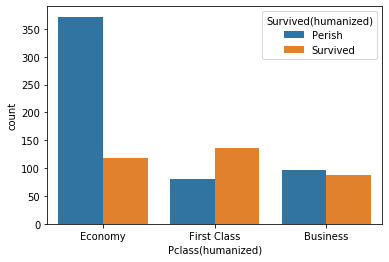

In [12]:
sns.countplot(data = train, x="Pclass(humanized)",hue="Survived(humanized)")

## 4번 문제

In [13]:
# pandas의 pivot_table을 활용하여 Embarked 별 생존률을 출력합니다.
# 여기서도 Embarked 컬럼이 C, S, Q라는 다소 직관적이지 않은 값이 나옵니다.
# 그러므로 Embarked 컬럼의 값도 Pclass 처럼 직관적으로 바꿔주고 싶습니다.
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [14]:
train.loc[train["Embarked"]=="C", "Embarked(humanized)"] = "Cherbourg"
train.loc[train["Embarked"]=="S", "Embarked(humanized)"] = "Southampton"
train.loc[train["Embarked"]=="Q", "Embarked(humanized)"] = "Queenstown"

train[["Embarked","Embarked(humanized)"]].head()

,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


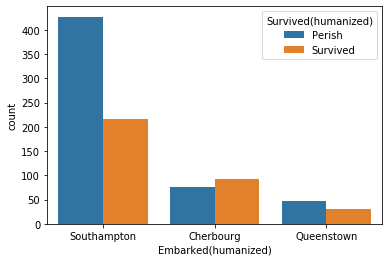

In [15]:
sns.countplot(data=train,x="Embarked(humanized)",hue="Survived(humanized)")

## 5번

In [16]:
print(train["Age"].mean(),train["Age"].max(),train["Age"].min())

29.69911764705882 80.0 0.42


## 6번

In [17]:
class1 = train[train["Pclass"] == 1]
class2 = train[train["Pclass"] == 2]
class3 = train[train["Pclass"] == 3]

c1A = class1["Age"].mean()
c2A = class2["Age"].mean()
c3A = class3["Age"].mean()

print("평균나이", f"First Class = {c1A:f}세",f"Business = {c2A:f}세",f"Economy = {c3A:f}세")

평균나이 First Class = 38.233441세 Business = 29.877630세 Economy = 25.140620세


## 7번

In [18]:
train.loc[train["Age"]<15,"AgeType"] = "Young"
train.loc[(train["Age"]>=15) & (train["Age"]<30), "AgeType"] = "Medium"
train.loc[train["Age"]>=30, "AgeType"] = "Old"

train[["Age","AgeType"]].head(10)

,Age,AgeType
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old
6,NaN,NaN
7,54.0,Old
8,2.0,Young
9,27.0,Medium


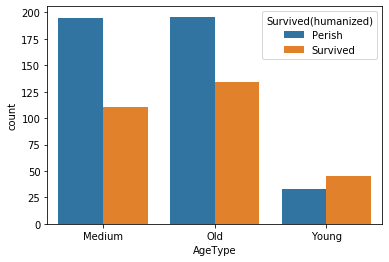

In [19]:
sns.countplot(data=train, x="AgeType", hue="Survived(humanized)")

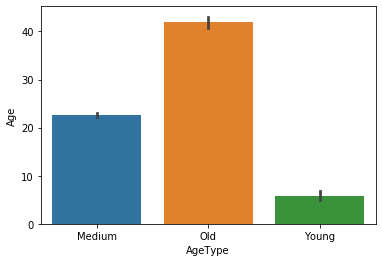

In [20]:
sns.barplot(data=train, x="AgeType", y="Age")

## 8번

In [21]:
train.loc[train["Age"].isnull(), "AgeBlank"] = "Blank"
train.loc[train["Age"].notnull(), "AgeBlank"] = "Not Blank"

train[["Age","AgeBlank"]].head(10)

,Age,AgeBlank
PassengerId,,
1,22.0,Not Blank
2,38.0,Not Blank
3,26.0,Not Blank
4,35.0,Not Blank
5,35.0,Not Blank
6,NaN,Blank
7,54.0,Not Blank
8,2.0,Not Blank
9,27.0,Not Blank


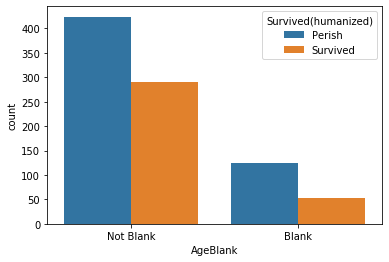

In [22]:
sns.countplot(data=train, x="AgeBlank", hue="Survived(humanized)")

In [23]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived(humanized),Pclass(humanized),Embarked(humanized),AgeType,AgeBlank
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perish,Economy,Southampton,Medium,Not Blank
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,Old,Not Blank
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy,Southampton,Medium,Not Blank
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,Old,Not Blank
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perish,Economy,Southampton,Old,Not Blank
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Perish,Economy,Queenstown,NaN,Blank
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Perish,First Class,Southampton,Old,Not Blank
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Perish,Economy,Southampton,Young,Not Blank
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Survived,Economy,Southampton,Medium,Not Blank


## 9번

In [24]:
train["Age(fill)"] = train["Age"]
train.loc[(train["Age"].isnull())&(train["Pclass"]==1), "Age(fill)"]=c1A
train.loc[(train["Age(fill)"].isnull())&(train["Pclass"]==2), "Age(fill)"]=c2A
train.loc[(train["Age(fill)"].isnull())&(train["Pclass"]==3), "Age(fill)"]=c3A

train[["Age","Age(fill)"]].head(20)

,Age,Age(fill)
PassengerId,,
1,22.0,22.00000
2,38.0,38.00000
3,26.0,26.00000
4,35.0,35.00000
5,35.0,35.00000
6,NaN,25.14062
7,54.0,54.00000
8,2.0,2.00000
9,27.0,27.00000


## 10번

In [33]:
train.loc[(train["SibSp"]==0) & (train["Parch"] == 0) , "Single"] = "True"
train.loc[(train["SibSp"]>=1) | (train["Parch"] >=1) , "Single"] = "False"

train[["SibSp" , "Parch", "Single"]].head()

,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


In [39]:
pd.pivot_table(train, index = "Single" , values = "Survived")

,Survived
Single,
False,0.505650
True,0.303538


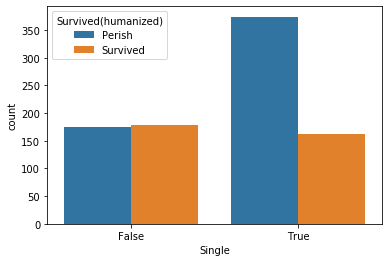

In [40]:
sns.countplot(data=train, x="Single", hue="Survived(humanized)")

## 11번

In [46]:
train["FamilySize"]=train["SibSp"]
train["FamilySize"]= train["FamilySize"] +train["Parch"]
train["FamilySize"]= train["FamilySize"] +1

train[["SibSp", "Parch", "FamilySize"]].head(10)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [47]:
pd.pivot_table(train, index="FamilySize", values = "Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


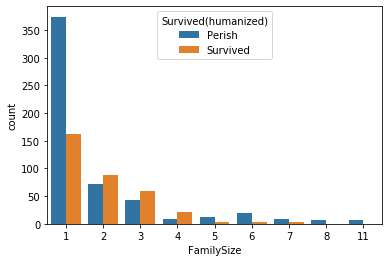

In [48]:
sns.countplot(data=train, x="FamilySize", hue="Survived(humanized)")

## 12번

In [53]:
train.loc[train["FamilySize"]==1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"]>=2) & (train["FamilySize"]<5) , 
          "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"]>=5, "FamilyType"] = "Big"

train[["FamilySize", "FamilyType"]].head(10)

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


In [54]:
pd.pivot_table(train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


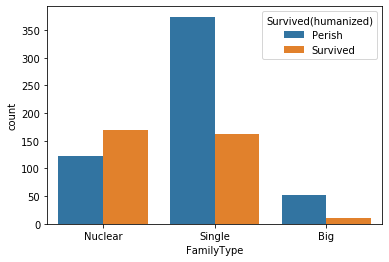

In [55]:
sns.countplot(data=train, x="FamilyType", hue="Survived(humanized)")